## Final Project Submission

Please fill out:
* Student name: James Kimani 
* Student pace: Part-Time
* Scheduled project review date/time:  
* Instructor name: Noah Kandie
* Blog post URL:


## 1. Importing Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## 2. Loading csv data into a dataframes.

In [2]:
df_reviews = pd.read_csv('data/title.ratings.csv')
df_titles = pd.read_csv('data/title.basics.csv')
df_gross = pd.read_csv('data/bom.movie_gross.csv')


## 3. Data Preparation

In [3]:
#Removing duplicates in our DataFrames if any

df_reviews.drop_duplicates(inplace=True)
df_titles.drop_duplicates(inplace=True)
df_gross.drop_duplicates(inplace=True)

### 3.1. Preparing and checking the ratings and titles dataframes

In [4]:
df_reviews['tconst'].nunique()

73856

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [6]:
df_reviews.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [7]:
df_reviews.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### 3.1.1 Combining the Review data frame and Titles DataFrame

In [8]:
df_titles_reviews =  pd.merge(df_titles, df_reviews, on = 'tconst')
df_titles_reviews.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### 3.1.2. Checking and Dealing with Missing values

In [9]:
#Checking for missing values
df_titles_reviews.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [10]:
# Replacing the missing values in the runtime_minutes column with the nean of the column

# Calculate the mean of the runtime_munites
mean_value = df_titles_reviews['runtime_minutes'].mean()

# Replace missing values with the mean
df_titles_reviews['runtime_minutes'].fillna(mean_value, inplace=True)

## We drop all the columns with the missing genres since the number is low

df_titles_reviews.dropna(subset = ['genres'], inplace = True)

# Print the DataFrame after replacing missing values
df_titles_reviews.isna().sum()


tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

#### 3.1.3. Droping unneccessary columns.

In [11]:
''' 
Since the primary_title and original_title hold the same information,
i.e the name of the movie where the original title holds the name of the movie in native language other than Engilish
we shall drop the ' original_title' column since haveing the titles in english is better for the our intented audience
'''


df_titles_reviews.drop(columns = ['original_title'], inplace = True)
df_titles_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  73052 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


### 3.2. Cleaning and checking the gross dataframe

In [12]:
#Displaying the first five entries of the data frame
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
#Checking the datatypes
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [14]:
#checking the different datatypes in foreign_gross
unique_data_types = df_gross['foreign_gross'].apply(type).unique()
unique_data_types

array([<class 'str'>, <class 'float'>], dtype=object)

In [15]:
#Striping the column of the '' to allow us convert the whole column into a float datatype
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '').astype(float)

In [16]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

#### 3.2.1 Checking and Dealing with Missing values

In [17]:
#checking for missing values
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [18]:
#Obtaining the mean and mode of the foreign_gross columns
domestic_mean =  df_gross['domestic_gross'].mean()
domestic_median = df_gross['domestic_gross'].median()

print("Mean is "  + str(domestic_mean))
print("Mode is " + str(domestic_median))

Mean is 28745845.06698422
Mode is 1400000.0


In [19]:
#Obtaining the mean and mode of the foreign_gross columns
foreign_mean =  df_gross['foreign_gross'].mean()
foreign_median = df_gross['foreign_gross'].median()

print("Mean is "  + str(foreign_mean))
print("Mode is " + str(foreign_median))

Mean is 74872810.15046637
Mode is 18700000.0


In [20]:
#Droping the missing values based on the domestic_gross column since the number is low

df_gross.dropna(subset=['domestic_gross'],inplace = True)
df_gross.dropna(subset=['studio'],inplace = True)
df_gross.dropna(subset=['foreign_gross'],inplace = True)
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [21]:
#Dealing with Missing values in the foreign gross column



#### 3.2.2 Checking and Dealing with Outliers

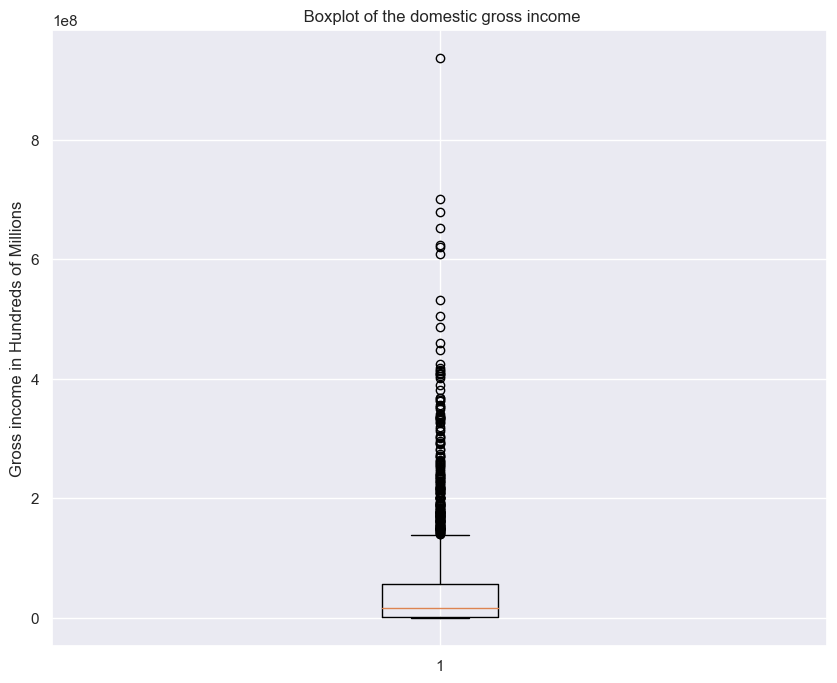

In [22]:
### Observing outliers for domestic_gross

plt.figure(figsize = (10,8))

plt.boxplot(df_gross['domestic_gross'])
plt.title(' Boxplot of the domestic gross income')
plt.ylabel('Gross income in Hundreds of Millions')
plt.show()

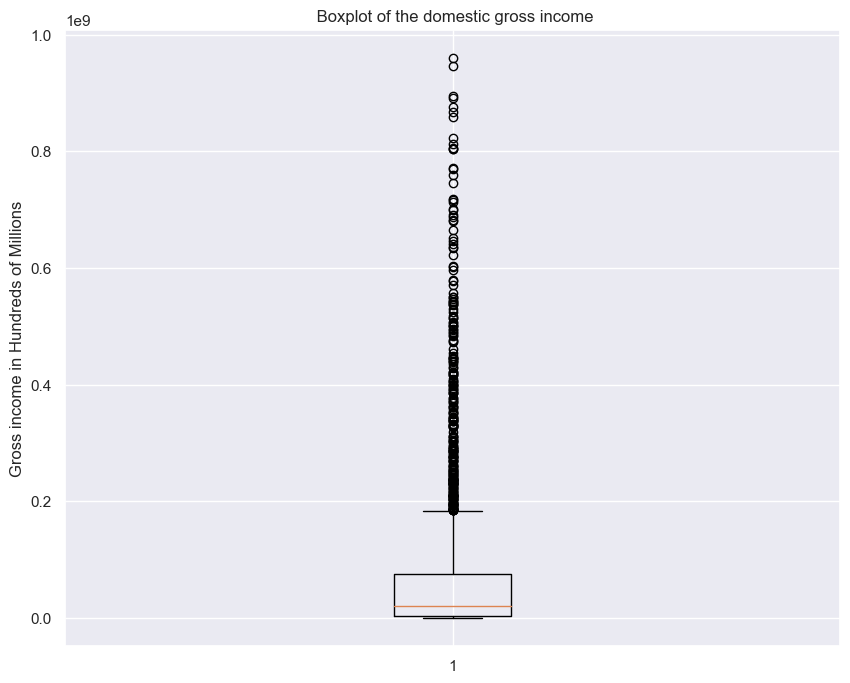

In [23]:
### Observing outliers for foreign_gross

plt.figure(figsize = (10,8))

plt.boxplot(df_gross['foreign_gross'])
plt.title(' Boxplot of the domestic gross income')
plt.ylabel('Gross income in Hundreds of Millions')
plt.show()

In [24]:
#Obtaining the mean and mode of the foreign_gross columns
gross_mean =  df_gross['foreign_gross'].mean()
gross_median = df_gross['foreign_gross'].median()

print("Mean is "  + str(gross_mean))
print("Mode is " + str(gross_median))

Mean is 75790384.84130543
Mode is 19400000.0


#### 3.2.2 Checking and Dealing with duplicates

In [25]:
df_gross['title'].duplicated().sum()

0

In [26]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [27]:
df_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## 4. Data Visualization

### 4.1 Number of movies released per year

In [28]:
movies_year = df_titles_reviews.groupby('start_year').count()
movies_year

,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes
start_year,,,,,,
2010,6701,6701,6701,6701,6701,6701
2011,7274,7274,7274,7274,7274,7274
2012,7602,7602,7602,7602,7602,7602
2013,7905,7905,7905,7905,7905,7905
2014,8269,8269,8269,8269,8269,8269
2015,8405,8405,8405,8405,8405,8405
2016,8613,8613,8613,8613,8613,8613
2017,8638,8638,8638,8638,8638,8638
2018,7476,7476,7476,7476,7476,7476


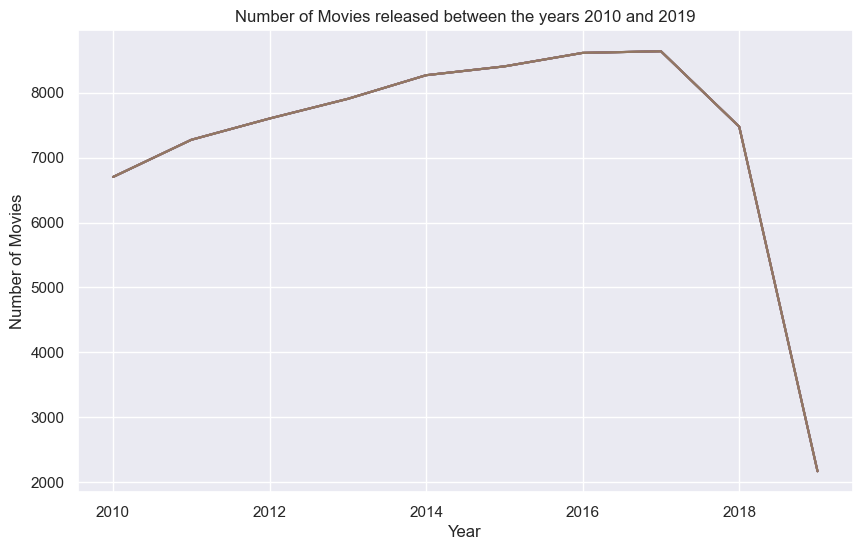

In [29]:
# Ploting the number of movies per year between 2010 and 2019

plt.figure(figsize = (10,6))
plt.plot(movies_year)
plt.title("Number of Movies released between the years 2010 and 2019")
plt.xlabel("Year")
plt.ylabel('Number of Movies')
plt.show()

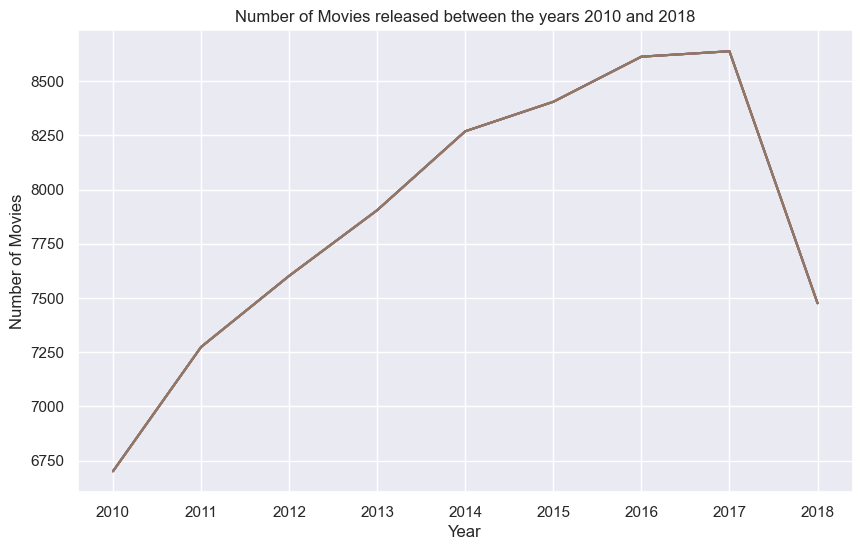

In [30]:
## Movie releases per year, exculing the year 2019
movie_year = df_titles_reviews[df_titles_reviews['start_year'] != 2019]
movies_year = movie_year.groupby('start_year').count()
movies_year

#Ploting without movies released in 2019
plt.figure(figsize = (10,6))
plt.plot(movies_year)
plt.title("Number of Movies released between the years 2010 and 2018")
plt.xlabel("Year")
plt.ylabel('Number of Movies')
plt.show()





### 4.2 Average Movie ratings


In [31]:
df_titles_reviews.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119


In [32]:
year_rating =  df_titles_reviews.groupby('start_year')['averagerating'].mean()
year_rating

start_year
2010    6.256245
2011    6.287352
2012    6.296212
2013    6.285693
2014    6.319761
2015    6.265854
2016    6.344421
2017    6.392359
2018    6.414393
2019    6.703227
Name: averagerating, dtype: float64

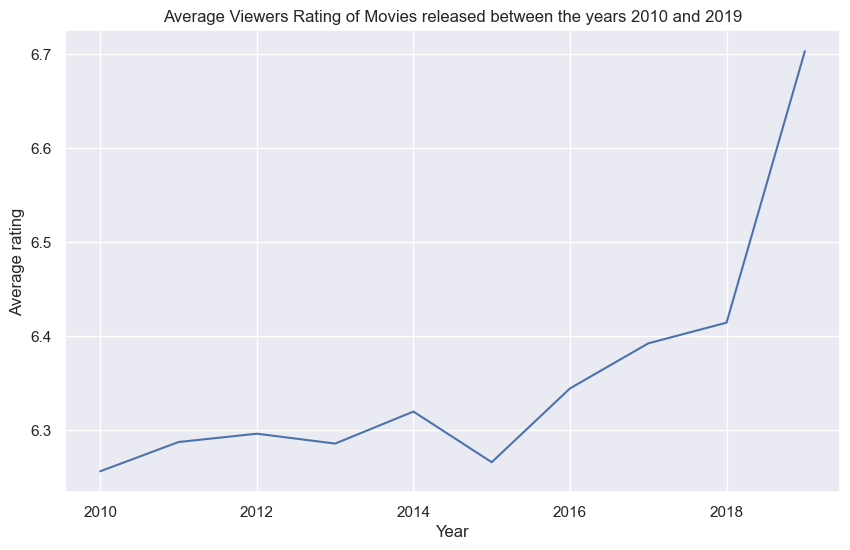

In [33]:
plt.figure(figsize = (10,6))
plt.plot(year_rating)
plt.title("Average Viewers Rating of Movies released between the years 2010 and 2019")
plt.xlabel("Year")
plt.ylabel('Average rating')
plt.show()


### 4.3. Most popular movies

In [34]:
df_titles_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  73052 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [35]:
#We calculate the average rating of all the movies in our data Frame

average_rating = df_titles_reviews['averagerating'].mean()

#We create a columns ' Weighted_Rating' that will be a result of the forular below
'''
weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the Top 250 (currently 3000)
C = the mean vote across the whole report (currently 6.9)

''' 
df_titles_reviews['weighted_rating']  = (df_titles_reviews['numvotes'] / (df_titles_reviews['numvotes'] + 3000)) * df_titles_reviews['averagerating'] + (3000 / (df_titles_reviews['numvotes'] + 3000)) * average_rating

df_titles_reviews.head()


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,weighted_rating
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77,6.347673
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.2,43,6.343211
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517,6.672887
3,tt0069204,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13,6.329934
4,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119,6.337381


In [36]:
### Otaining the Higgest Rated Movies using average rating

movies_ratings = df_titles_reviews[['primary_title','averagerating','genres']].sort_values(by = 'averagerating', ascending =  False)
movies_ratings.head(20)

,primary_title,averagerating,genres
9745,Freeing Bernie Baran,10.0,"Crime,Documentary"
53689,The Paternal Bond: Barbary Macaques,10.0,Documentary
65944,Calamity Kevin,10.0,"Adventure,Comedy"
42970,I Was Born Yesterday!,10.0,Documentary
50085,Revolution Food,10.0,Documentary
878,The Dark Knight: The Ballad of the N Word,10.0,"Comedy,Drama"
53408,All Around Us,10.0,Documentary
71577,Pick It Up! - Ska in the '90s,10.0,Documentary
49925,Dog Days in the Heartland,10.0,Drama
702,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary


In [37]:
### Otaining the Higgest Rated Movies using weighted rating

movies_ratings = df_titles_reviews[['primary_title','weighted_rating','genres']].sort_values(by = 'weighted_rating', ascending =  False)
movies_ratings.head(20)

,primary_title,weighted_rating,genres
56850,The Mountain II,9.213997,"Action,Drama,War"
26882,CM101MMXI Fundamentals,9.006840,"Comedy,Documentary"
53484,Aynabaji,8.885132,"Crime,Mystery,Thriller"
18708,Wheels,8.861394,Drama
2387,Inception,8.795983,"Action,Adventure,Sci-Fi"
43420,Avengers: Endgame,8.783322,"Action,Adventure,Sci-Fi"
68282,Peranbu,8.670947,Drama
280,Interstellar,8.594773,"Adventure,Drama,Sci-Fi"
35739,Drishyam,8.528932,"Crime,Drama,Thriller"
65296,Once Upon a Time ... in Hollywood,8.524743,"Comedy,Drama"


In [38]:
year_weighted_rating =  df_titles_reviews.groupby('start_year')['weighted_rating'].mean()
year_weighted_rating

start_year
2010    6.318615
2011    6.313994
2012    6.310523
2013    6.314277
2014    6.315023
2015    6.314232
2016    6.317638
2017    6.319027
2018    6.326758
2019    6.338246
Name: weighted_rating, dtype: float64

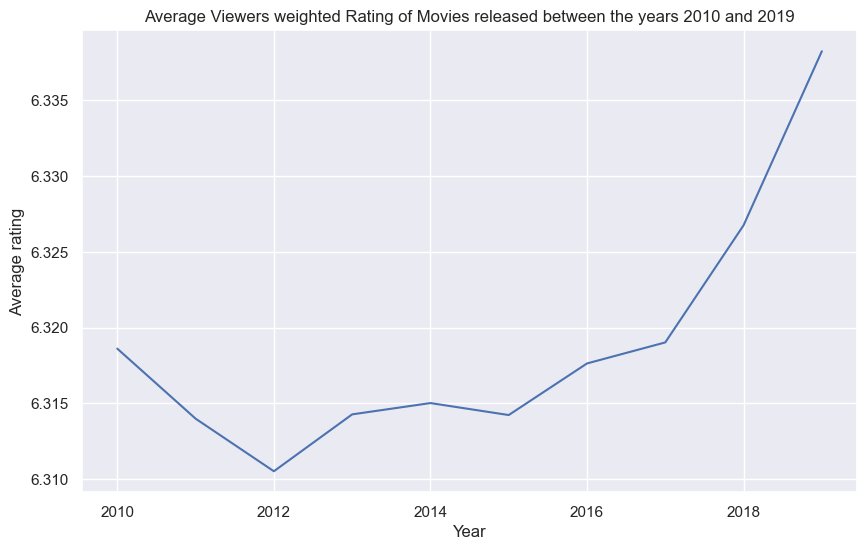

In [39]:
plt.figure(figsize = (10,6))
plt.plot(year_weighted_rating)
plt.title("Average Viewers weighted Rating of Movies released between the years 2010 and 2019")
plt.xlabel("Year")
plt.ylabel('Average rating')
plt.show()

In [40]:
df_titles_reviews['runtime_minutes']

0        175.00000
1        114.00000
2        122.00000
3         94.65404
4         80.00000
           ...    
73850     86.00000
73851     75.00000
73852     98.00000
73853     94.65404
73855     72.00000
Name: runtime_minutes, Length: 73052, dtype: float64

### 4.4 Distribution of Movie run time

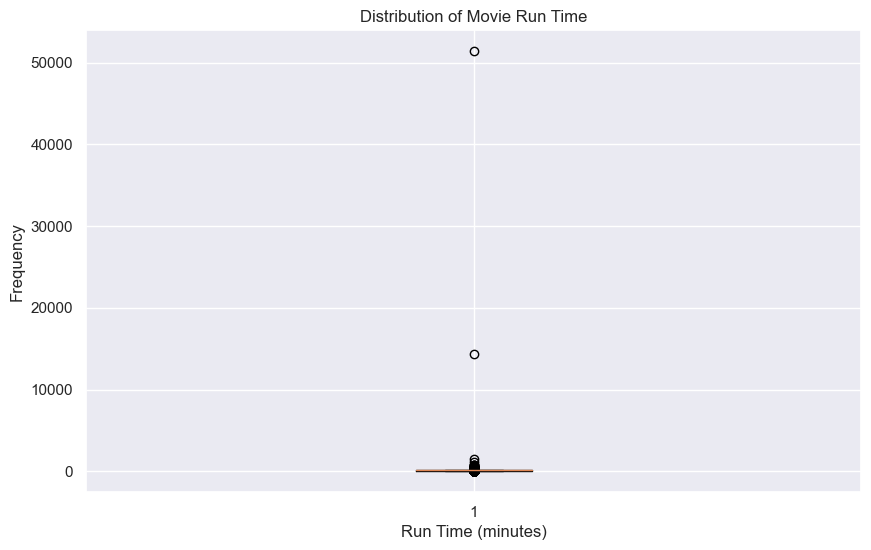

In [41]:
# Create the distribution plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df_titles_reviews['runtime_minutes'])  # Create the distribution plot
plt.title('Distribution of Movie Run Time')  # Set the title of the plot
plt.xlabel('Run Time (minutes)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot


In [42]:
average_runtime = df_titles_reviews['runtime_minutes'].mean()
min_runtime = df_titles_reviews['runtime_minutes'].min()
max_runtime = df_titles_reviews['runtime_minutes'].max()
mode_runtime = df_titles_reviews['runtime_minutes'].mode()

print(f" The average movie runtime is " + str(average_runtime) + " while the maximum and minumum runtime in minutes is " + str(max_runtime)+ " and " +str(min_runtime))

 The average movie runtime is 94.72442126165141 while the maximum and minumum runtime in minutes is 51420.0 and 3.0


In [43]:
df_titles_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  73052 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
 7   weighted_rating  73052 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.0+ MB


### 4.5 Most Porpular Genre of Movie Releases

In [44]:
# Splitting the 'genres' column by ',' and creating a list of genres for each row
df_titles_reviews['genres'] = df_titles_reviews['genres'].str.split(',')

# Exploding the list of genres into separate rows
exploded_df = df_titles_reviews.explode('genres')

# Getting the counts of each genre
genre_counts = exploded_df['genres'].value_counts()


# Displaying the DataFrame
print(genre_counts)

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64


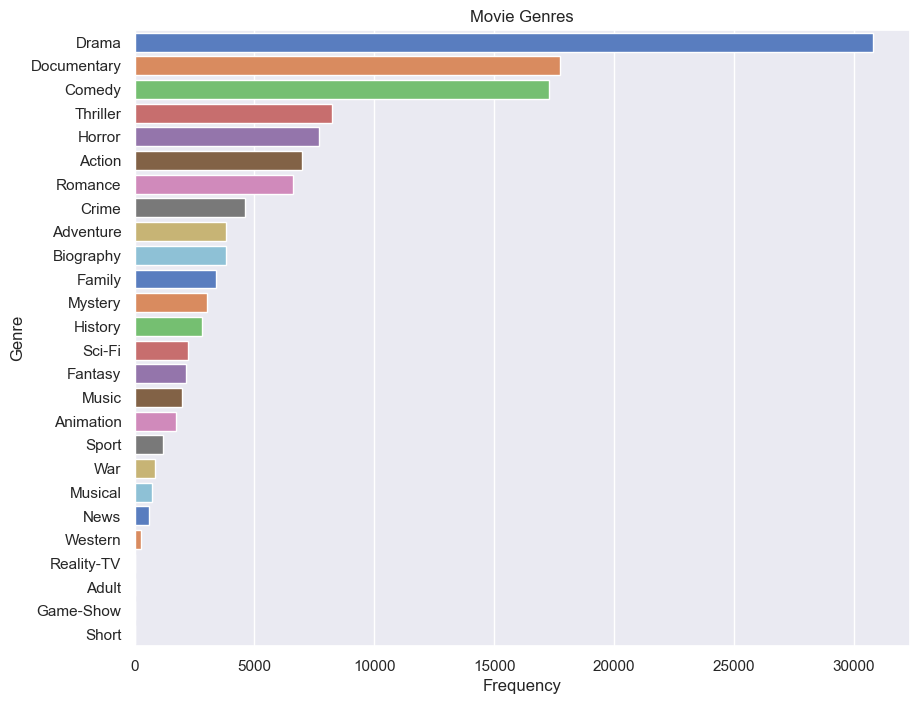

In [59]:
## Visualizing porpular movie Genre

plt.figure(figsize=(10, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Movie Genres')
plt.show()


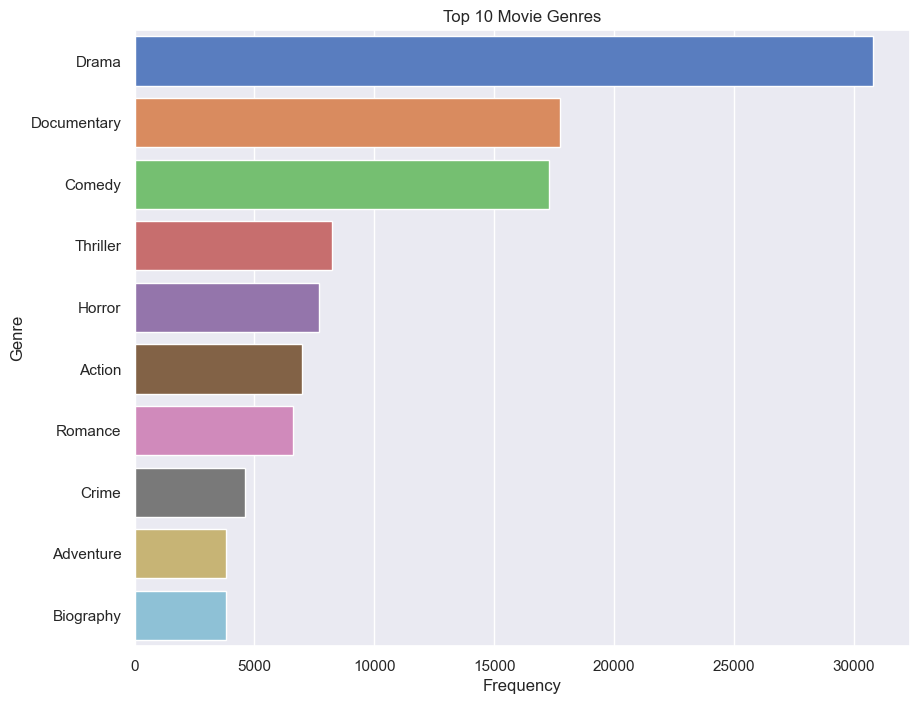

In [58]:
## Visualizing the to_10 porpular movie Genre


top_10 = genre_counts.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_10.index, x= top_10.values, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres')
plt.show()

### 4.6 Most porpular Movie Studios

In [47]:
studio_counts= df_gross['studio'].value_counts()
top_studio_counts = studio_counts.head(15)

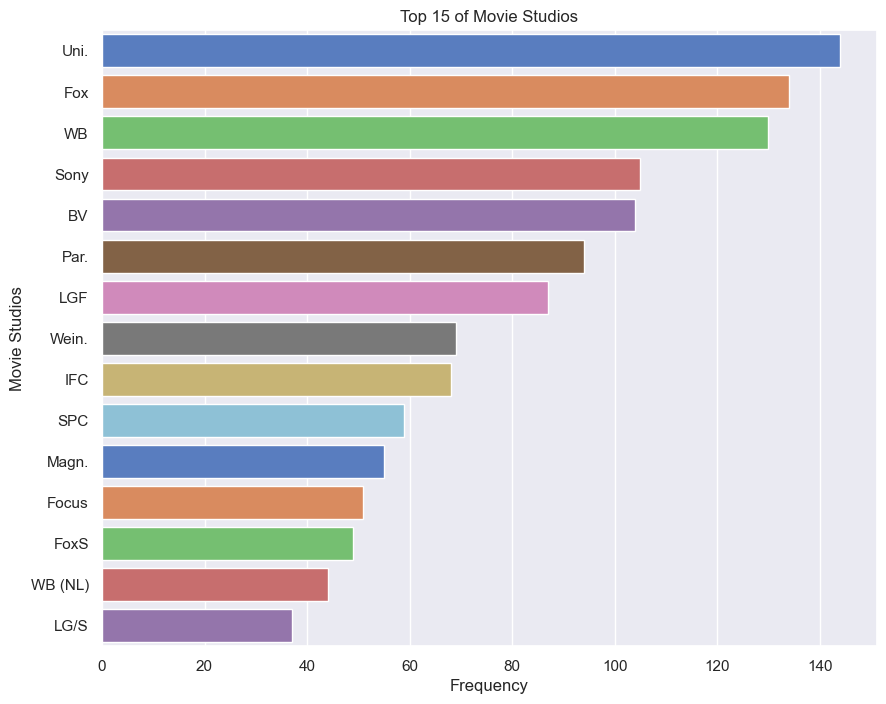

In [48]:
## Visualizing most porpular Movie Studios

plt.figure(figsize=(10, 8))
sns.barplot(y=top_studio_counts.index, x=top_studio_counts.values, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Movie Studios')
plt.title('Top 15 of Movie Studios')
plt.show()

In [49]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


### 4.7 Highest Grossing Movies

In [50]:
## Domestic Gross, IN asceding
movies_domestic = df_gross.sort_values(by = 'domestic_gross', ascending = True)
movies_domestic

,title,studio,domestic_gross,foreign_gross,year
1018,Apartment 143,Magn.,400.0,426000.0,2012
2920,Amityville: The Awakening,W/Dim.,700.0,7700000.0,2017
642,Illegal (2011),FM,700.0,289000.0,2011
292,Perrier's Bounty,IFC,800.0,167000.0,2010
1738,Jackpot,DR,800.0,1100000.0,2014
...,...,...,...,...,...
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3080,Black Panther,BV,700100000.0,646900000.0,2018


In [51]:
## Domestic Gross, in descending
movies_domestic = df_gross.sort_values(by = 'domestic_gross', ascending = False)
movies_domestic

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
...,...,...,...,...,...
292,Perrier's Bounty,IFC,800.0,167000.0,2010
1738,Jackpot,DR,800.0,1100000.0,2014
2920,Amityville: The Awakening,W/Dim.,700.0,7700000.0,2017
642,Illegal (2011),FM,700.0,289000.0,2011


In [52]:
## Foreign Gross, Asceding

movies_foreign = df_gross.sort_values(by = 'foreign_gross', ascending = False)
movies_foreign

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
...,...,...,...,...,...
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
2760,The Fate of the Furious,Uni.,226000000.0,1010.0,2017
721,To Die Like a Man,Strand,4000.0,900.0,2011


In [53]:
## Foreign Gross, Asceding

top_movies_foreign = df_gross.sort_values(by = 'foreign_gross', ascending = False)
top_10_movies = top_movies_foreign.head(20)
top_10_movies

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


In [54]:
type(df_titles_reviews)

pandas.core.frame.DataFrame

## 5. Observations and Recomendations

In [55]:
#Remaning the title column in the top 10 movies to primary_title

top_10_movies.rename(columns={'title': 'primary_title'}, inplace=True)
top_10_movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 328 to 1478
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   20 non-null     object 
 1   studio          20 non-null     object 
 2   domestic_gross  20 non-null     float64
 3   foreign_gross   20 non-null     float64
 4   year            20 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 960.0+ bytes


C:\Users\USER\AppData\Local\Temp\ipykernel_8128\302423710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_movies.rename(columns={'title': 'primary_title'}, inplace=True)


In [56]:
#combining the top_10_movies and df_titles_reviews dataframes on 
df_top_moviews =  pd.merge(top_10_movies, df_titles_reviews, on = 'primary_title')
df_titles_reviews.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,weighted_rating
0,tt0063540,Sunghursh,2013,175.00000,"[Action, Crime, Drama]",7.0,77,6.347673
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"[Biography, Drama]",7.2,43,6.343211
2,tt0069049,The Other Side of the Wind,2018,122.00000,[Drama],6.9,4517,6.672887
3,tt0069204,Sabse Bada Sukh,2018,94.65404,"[Comedy, Drama]",6.1,13,6.329934
4,tt0100275,The Wandering Soap Opera,2017,80.00000,"[Comedy, Drama, Fantasy]",6.5,119,6.337381
